# Imports and setting up viz

NB : conda env1 on Mac, lam1env on spirit (Python3.12)

In [1]:
import numpy as np
import netCDF4 as nc
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler
import cartopy.crs as ccrs
import cartopy
import matplotlib as mpl
from matplotlib.colors import ListedColormap
%matplotlib inline

/home/ptiengou/.conda/envs/lam1env/lib/python3.12/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [2]:
plt.rcParams.update(
        {
            'figure.facecolor': 'white',
            'axes.facecolor': 'white',
            'font.size': 12,
            'figure.dpi': 72.0,
            'xtick.direction': 'in',
            'ytick.direction': 'in',
            'xtick.major.size': 5.0,
            'xtick.minor.size': 2.5,
            'ytick.major.size': 5.0,
            'ytick.minor.size': 2.5,
            'xtick.minor.visible': True,
            'ytick.minor.visible': True,
            'axes.grid': True,
            'axes.titlesize': 'larger',
            'axes.labelsize': 'larger',
            'grid.color': 'dimgray',
            'grid.linestyle': '-',
            'grid.alpha': 0.3,
            'axes.prop_cycle': cycler(
                color=[
                    '#0C5DA5',
                    '#FF9500',
                    '#00B945',
                    '#FF2C00',
                    '#845B97',
                    '#474747',
                    '#9E9E9E',
                ]
            ) * cycler(alpha=[0.8]),
            'scatter.marker': 'x',
            'lines.linewidth': 1.0,
        })

In [3]:
rivers = cartopy.feature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m',edgecolor=(0, 0, 0, 0.3), facecolor='none')

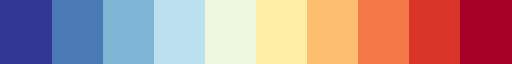

In [4]:
#define centered colorbar
emb = ListedColormap(mpl.colormaps['RdYlBu_r'](np.linspace(0, 1, 10)))
emb

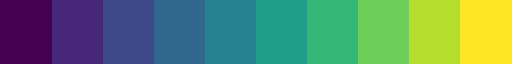

In [5]:
#define progressive colorbar
myvir = ListedColormap(mpl.colormaps['viridis'](np.linspace(0, 1, 10)))
myvir

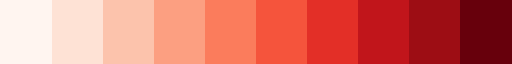

In [6]:
#define progressive colorbar
reds = ListedColormap(mpl.colormaps['Reds'](np.linspace(0, 1, 10)))
reds

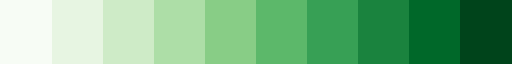

In [7]:
#define progressive colorbar
greens = ListedColormap(mpl.colormaps['Greens'](np.linspace(0, 1, 10)))
greens

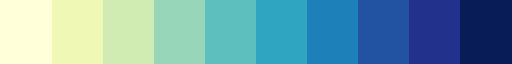

In [8]:
#define progressive colorbar
wet = ListedColormap(mpl.colormaps['YlGnBu'](np.linspace(0, 1, 10)))
wet

# Load files

LAM output analysis.

Simu irr et simu no-irr.

In [9]:
obs_dir='/data/ptiengou/MOSAI-DEPHY/Obs'
lam6_dir='/data/ptiengou/MOSAI-DEPHY/PFT6'
lam13_dir='/data/ptiengou/MOSAI-DEPHY/PFT13'
ORC_OL_dir = '/data/cheruy/IGCM_OUT/OL2/TEST/secsto'

In [10]:
#open LAM files
filename = '{}/*.nc'.format(lam6_dir)
lam6 = xr.open_mfdataset(filename)
filename = '{}/ORC/*.nc'.format(lam6_dir)
lam6ORC = xr.open_mfdataset(filename)

filename = '{}/*.nc'.format(lam13_dir)
lam13 = xr.open_mfdataset(filename)
filename = '{}/ORC/*.nc'.format(lam13_dir)
lam13ORC = xr.open_mfdataset(filename)

lam6

<xarray.Dataset>
Dimensions:            (time_counter: 8760, bnds: 2, lon: 1, lat: 1)
Coordinates:
  * time_counter       (time_counter) datetime64[ns] 2023-01-01T00:30:00 ... ...
  * lon                (lon) float32 0.3445
  * lat                (lat) float32 43.15
Dimensions without coordinates: bnds
Data variables:
    time_counter_bnds  (time_counter, bnds) datetime64[ns] dask.array<chunksize=(744, 2), meta=np.ndarray>
    flat               (time_counter, lat, lon) float32 dask.array<chunksize=(744, 1, 1), meta=np.ndarray>
    precip             (time_counter, lat, lon) float32 dask.array<chunksize=(744, 1, 1), meta=np.ndarray>
    evap               (time_counter, lat, lon) float32 dask.array<chunksize=(744, 1, 1), meta=np.ndarray>
    sens               (time_counter, lat, lon) float32 dask.array<chunksize=(744, 1, 1), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.10 (https://mpimet.mpg.d...
    Conventions:  CF-1.6
    name:         histhf
    description:  Created by xios
    title:        Created by xios
    timeStamp:    2024-May-27 10:58:23 GMT
    uuid:         09a9ba89-d7f0-46af-b944-9e52fb1585ae
    history:      Wed May 29 06:29:41 2024: cdo -L sellonlatbox,0.30,0.39,43....
    CDO:          Climate Data Operators version 1.9.10 (https://mpimet.mpg.d...

In [11]:
#open ORC_OL files
filename = '/data/nvuichard/IGCM_OUT/OL2/TEST/secsto/FG2-test-PFT6/SRF/Output/MO/FG2-test-PFT6_20140101_20231231_1M_sechiba_history.nc'
ORC_OL6 =  xr.open_mfdataset(filename)

In [12]:
#open obs files
obs_file = '{}/MOSAI_P2OA_MAIZE_CNRM_MTO-FLUX-30MIN_L2_20230414-20231231_V1.nc'.format(obs_dir)
obs_maize = xr.open_dataset(obs_file)

obs_file = '{}/MOSAI_P2OA_DECIDUOUS_CNRM_MTO-FLUX-30MIN_L2_20230317-20231231_V1.nc'.format(obs_dir)
obs_forest = xr.open_dataset(obs_file)

obs_maize

<xarray.Dataset>
Dimensions:              (time: 12576, level: 2)
Coordinates:
  * time                 (time) datetime64[ns] 2023-04-14T00:30:00 ... 2024-0...
Dimensions without coordinates: level
Data variables: (12/60)
    time_bnds            (time, level) datetime64[ns] ...
    pa                   (time) float32 ...
    ta_1                 (time) float32 ...
    ta_2                 (time) float32 ...
    air_density          (time) float32 ...
    h2o_molar_density    (time) float32 ...
    ...                   ...
    soil_temp_1          (time) float32 ...
    soil_temp_2          (time) float32 ...
    soil_temp_3          (time) float32 ...
    soil_moisture_1      (time) float32 ...
    soil_moisture_2      (time) float32 ...
    soil_moisture_3      (time) float32 ...
Attributes: (12/39)
    institution:               CNRM, Université de Toulouse, Météo-France, CN...
    creator_email:             contact.tramm-cnrm@meteo.fr
    creator_institution:       CNRM, Université de Toulouse, Météo-France, CN...
    contributor_name:          Guylaine: Canut: guylaine.canut@meteo.fr: CNRM...
    contributor_role:          principalinvestigator;\nresourceprovider;\ncon...
    processing_level:          L2
    ...                        ...
    geospatial_vertical_min:   594.0
    geospatial_vertical_max:   594.0
    history:                   Wed Feb 28 2024, 11:29:10, Jacques Couzinier, ...
    time_coverage_start:       2023-04-14T00:30:00.000000Z
    time_coverage_end:         2024-01-01T00:00:00.000000Z
    time_coverage_resolution:  PT1800.000000S

In [21]:
ORC_OL6

<xarray.Dataset>
Dimensions:                (lat: 1, lon: 1, solay: 11, veget: 13, nbasmon: 1,
                            soiltyp: 3, albtyp: 2, nobio: 1, solth: 18,
                            time: 13920, axis_nbounds: 2)
Coordinates:
  * lat                    (lat) float32 43.12
  * lon                    (lon) float32 0.347
  * solay                  (solay) float32 0.0 0.001955 0.005865 ... 0.999 2.0
  * veget                  (veget) float32 1.0 2.0 3.0 4.0 ... 11.0 12.0 13.0
  * nbasmon                (nbasmon) float32 1.0
  * soiltyp                (soiltyp) float32 1.0 2.0 3.0
  * albtyp                 (albtyp) float32 1.0 2.0
  * nobio                  (nobio) float32 1.0
  * solth                  (solth) float32 0.0004888 0.001955 ... 33.53 65.56
    time_centered          (time) datetime64[ns] dask.array<chunksize=(13920,), meta=np.ndarray>
  * time                   (time) datetime64[ns] 2023-03-17T00:15:00 ... 2023...
Dimensions without coordinates: axis_nbounds
Data variables: (12/151)
    time_centered_bounds   (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(13920, 2), meta=np.ndarray>
    time_counter_bounds    (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(13920, 2), meta=np.ndarray>
    Areas                  (lat, lon) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    Contfrac               (lat, lon) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    evap                   (time, lat, lon) float32 dask.array<chunksize=(13920, 1, 1), meta=np.ndarray>
    coastalflow            (time, lat, lon) float32 dask.array<chunksize=(13920, 1, 1), meta=np.ndarray>
    ...                     ...
    Qg                     (time, lat, lon) float32 dask.array<chunksize=(13920, 1, 1), meta=np.ndarray>
    transpot               (time, veget, lat, lon) float32 dask.array<chunksize=(13920, 13, 1, 1), meta=np.ndarray>
    vbeta3pot              (time, veget, lat, lon) float32 dask.array<chunksize=(13920, 13, 1, 1), meta=np.ndarray>
    root_deficit           (time, lat, lon) float32 dask.array<chunksize=(13920, 1, 1), meta=np.ndarray>
    root_mc_fc             (time, lat, lon) float32 dask.array<chunksize=(13920, 1, 1), meta=np.ndarray>
    aei_sw                 (time, lat, lon) float32 dask.array<chunksize=(13920, 1, 1), meta=np.ndarray>
Attributes:
    name:         ORC_OL_forest
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-May-29 07:41:00 GMT
    uuid:         e2e44d81-da27-4ca8-8de7-e2b42b03623c
    LongName:     Ref config with old driver, CRUJRA2.2 twodeg and VEGET_UPDA...

# File manipulations

In [13]:
#Change dataset names attribute for automatic labeling
obs_maize.attrs['name'] = 'obs_maize'
obs_forest.attrs['name'] = 'obs_forest'
lam6.attrs['name'] = 'lam_forest'
lam6ORC.attrs['name'] = 'lam_forest_ORC'
lam13.attrs['name'] = 'lam_maize'
lam13ORC.attrs['name'] = 'lam_maize_ORC'
ORC_OL6.attrs['name'] = 'ORC_OL_forest'

In [14]:
#rename time_counter to time in ICOLMDZOR files
lam6 = lam6.rename({'time_counter':'time'})
lam6ORC = lam6ORC.rename({'time_counter':'time'})
lam13 = lam13.rename({'time_counter':'time'})
lam13ORC = lam13ORC.rename({'time_counter':'time'})
ORC_OL6 = ORC_OL6.rename({'time_counter':'time'})

In [15]:
#trim sim files to match obs period
#maize from 2023-04-14
lam13 = lam13.sel(time=slice('2023-04-14', None))
#forest from 2023-03-17
lam6 = lam6.sel(time=slice('2023-03-17', None))
ORC_OL6 = ORC_OL6.sel(time=slice('2023-03-17', None))

In [16]:
#rename obs var to LMDZ var name
obs_maize = obs_maize.rename({'lhf':'flat'})
obs_maize = obs_maize.rename({'shf':'sens'})
obs_forest = obs_forest.rename({'lhf':'flat'})
obs_forest = obs_forest.rename({'shf':'sens'})

In [17]:
#reverse LE and H for LAM outputs
lam6['sens'] = -lam6['sens']
lam6['flat'] = -lam6['flat']
lam13['sens'] = -lam13['sens']
lam13['flat'] = -lam13['flat']

In [18]:
#aggregate obs to hourly (to match LAM outputs)
# obs_maize = obs_maize
# obs_forest = obs_forest

In [19]:
#manually define variables
# HISTMTHnoirr['netrad']= HISTMTHnoirr['SWdnSFC']+HISTMTHnoirr['LWdnSFC'] - HISTMTHnoirr['SWupSFC'] - HISTMTHnoirr['LWupSFC']
# HISTMTHirr['netrad']= HISTMTHirr['SWdnSFC']+HISTMTHirr['LWdnSFC'] - HISTMTHirr['SWupSFC'] - HISTMTHirr['LWupSFC']

In [20]:
# Select the JJA months (June, July, August)
# ORCirr = ORCirr.sel(time=ORCirr['time.month'].isin([6, 7, 8]))
# ORCnoirr = ORCnoirr.sel(time=ORCnoirr['time.month'].isin([6, 7, 8]))
# HISTMTHirr = HISTMTHirr.sel(time=HISTMTHirr['time.month'].isin([6, 7, 8]))

# Time series

In [ ]:
#Average time series
var='evap'
ds1=obs_maize
ds2=obs_forest
ds3=lam13
ds4=lam6
fig = plt.figure(figsize=(10, 6))
ax = plt.axes()
ax.grid()
# ds1[var].plot(ax=ax, label=ds1.name)
# ds2[var].plot(ax=ax, label=ds2.name)
ds3[var].plot(ax=ax, label=ds3.name)
# ds4[var].plot(ax=ax, label=ds4.name)
plt.title(var)
plt.legend()

In [ ]:
#Average diurnal cycle
var='sens'
var2='flat'
ds1=obs_maize
ds2=obs_forest
ds3=lam13
ds4=lam6
fig = plt.figure(figsize=(10, 6))
ax = plt.axes()
ax.grid()
ds1[var].groupby('time.hour').mean(dim='time').plot(ax=ax, label=ds1.name)
ds2[var].groupby('time.hour').mean(dim='time').plot(ax=ax, label=ds2.name)
ds3[var].groupby('time.hour').mean(dim='time').plot(ax=ax, label=ds3.name)
ds4[var].groupby('time.hour').mean(dim='time').plot(ax=ax, label=ds4.name)
plt.title('Mean diurnal cycle for {}'.format(var))
plt.legend()

In [ ]:
# Average diurnal cycle
var = 'sens'
var2 = 'flat'
ds1 = obs_maize
ds2 = obs_forest
ds3 = lam13
ds4 = lam6

# Create a figure with two subplots side-by-side
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot for the first variable
ax1.grid()
ds1[var].groupby('time.hour').mean(dim='time').plot(ax=ax1, label=ds1.name)
ds2[var].groupby('time.hour').mean(dim='time').plot(ax=ax1, label=ds2.name)
ds3[var].groupby('time.hour').mean(dim='time').plot(ax=ax1, label=ds3.name)
ds4[var].groupby('time.hour').mean(dim='time').plot(ax=ax1, label=ds4.name)
ax1.set_title('Mean diurnal cycle for {}'.format(var))
ax1.legend()

# Plot for the second variable
ax2.grid()
ds1[var2].groupby('time.hour').mean(dim='time').plot(ax=ax2, label=ds1.name)
ds2[var2].groupby('time.hour').mean(dim='time').plot(ax=ax2, label=ds2.name)
ds3[var2].groupby('time.hour').mean(dim='time').plot(ax=ax2, label=ds3.name)
ds4[var2].groupby('time.hour').mean(dim='time').plot(ax=ax2, label=ds4.name)
ax2.set_title('Mean diurnal cycle for {}'.format(var2))
ax2.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

In [ ]:
#Cumulated time series
var='flat'
ds1=obs_maize
ds2=obs_forest
mask_maize = ~np.isnan(ds1)
ds3=lam13
ds4=lam6
fig = plt.figure(figsize=(10, 6))
ax = plt.axes()
ax.grid()
ds1[var].cumsum().plot(ax=ax, label=ds1.name)
# ds2[var].cumsum().plot(ax=ax, label=ds2.name)
ds3[var].where(mask_maize, np.nan).cumsum().plot(ax=ax, label=ds3.name)
# ds4[var].cumsum().plot(ax=ax, label=ds4.name)
plt.title(var)
plt.legend()

In [ ]:
#Cumulated precip vs evap
var='evap'
var2='precip'
ds1=obs_maize
ds2=obs_forest
ds3=lam13
ds4=lam6
fig = plt.figure(figsize=(10, 6))
ax = plt.axes()
ax.grid()
# ds1[var].cumsum().plot(ax=ax, label=ds1.name)
# ds2[var].cumsum().plot(ax=ax, label=ds2.name)
ds3[var].cumsum().plot(ax=ax, label=var + ' ' + ds3.name)
ds3[var2].cumsum().plot(ax=ax, label=var2 + ' ' + ds3.name)
ds4[var].cumsum().plot(ax=ax, label=var + ' ' + ds4.name)
ds4[var2].cumsum().plot(ax=ax, label=var2 + ' ' + ds4.name)
plt.title('Evap and precip')
plt.legend()